[Reference](https://medium.com/@get_excelsior/neural-networks-time-series-analysis-great-forecasting-9d12c9192e00)

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
iris_data = datasets.load_iris()
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)

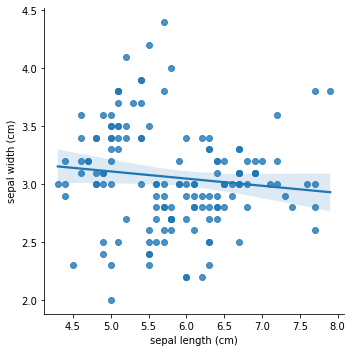

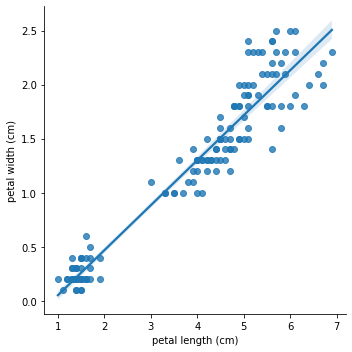

In [31]:
df_iris = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']],columns=iris_data['feature_names'] + ['target'])
sns.lmplot(x='sepal length (cm)',y='sepal width (cm)', fit_reg=True,data=df_iris)
sns.lmplot(x='petal length (cm)',y='petal width (cm)', fit_reg=True,data=df_iris)

In [32]:
print(df_iris.corr())

                   sepal length (cm)  ...    target
sepal length (cm)           1.000000  ...  0.782561
sepal width (cm)           -0.117570  ... -0.426658
petal length (cm)           0.871754  ...  0.949035
petal width (cm)            0.817941  ...  0.956547
target                      0.782561  ...  1.000000

[5 rows x 5 columns]


In [37]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

In [38]:
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print('Summary of the Neural Model: ')
print(model.summary())

Summary of the Neural Model: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [39]:
model.fit(X_train, Y_train, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
24/24 - 1s - loss: 1.1253 - accuracy: 0.3333 - 749ms/epoch - 31ms/step
Epoch 2/200
24/24 - 0s - loss: 1.0594 - accuracy: 0.3833 - 53ms/epoch - 2ms/step
Epoch 3/200
24/24 - 0s - loss: 1.0416 - accuracy: 0.6750 - 33ms/epoch - 1ms/step
Epoch 4/200
24/24 - 0s - loss: 1.0190 - accuracy: 0.6667 - 33ms/epoch - 1ms/step
Epoch 5/200
24/24 - 0s - loss: 1.0051 - accuracy: 0.6667 - 40ms/epoch - 2ms/step
Epoch 6/200
24/24 - 0s - loss: 0.9814 - accuracy: 0.6667 - 51ms/epoch - 2ms/step
Epoch 7/200
24/24 - 0s - loss: 0.9639 - accuracy: 0.6583 - 40ms/epoch - 2ms/step
Epoch 8/200
24/24 - 0s - loss: 0.9373 - accuracy: 0.6667 - 46ms/epoch - 2ms/step
Epoch 9/200
24/24 - 0s - loss: 0.9125 - accuracy: 0.6667 - 44ms/epoch - 2ms/step
Epoch 10/200
24/24 - 0s - loss: 0.8832 - accuracy: 0.6667 - 46ms/epoch - 2ms/step
Epoch 11/200
24/24 - 0s - loss: 0.8566 - accuracy: 0.6667 - 38ms/epoch - 2ms/step
Epoch 12/200
24/24 - 0s - loss: 0.8212 - accuracy: 0.6667 - 39ms/epoch - 2ms/step
Epoch 13/200
24/24 - 0s

In [40]:
predictions = model.predict(X_test)
print("Predicted Values: ", predictions)

Predicted Values:  [[9.99569952e-01 4.30036976e-04 2.43544324e-10]
 [2.14086481e-06 1.92183688e-01 8.07814181e-01]
 [6.56950928e-04 9.98623967e-01 7.19095580e-04]
 [2.30335025e-03 9.97234285e-01 4.62471537e-04]
 [6.19801503e-05 9.78567004e-01 2.13710554e-02]
 [2.42561896e-06 1.09082937e-01 8.90914619e-01]
 [9.99461114e-01 5.38856257e-04 3.99144301e-10]
 [2.43640563e-04 9.50603604e-01 4.91528176e-02]
 [3.86979551e-08 1.13213677e-02 9.88678634e-01]
 [9.99380708e-01 6.19316706e-04 4.32592268e-10]
 [9.99732196e-01 2.67795142e-04 5.18959355e-11]
 [9.98827994e-01 1.17196143e-03 4.09549006e-10]
 [8.48053969e-05 9.38623428e-01 6.12917691e-02]
 [9.99837518e-01 1.62455326e-04 4.07131759e-11]
 [9.52240669e-08 1.42979575e-02 9.85701919e-01]
 [1.56403650e-04 9.97982740e-01 1.86079380e-03]
 [2.26289629e-07 5.21603562e-02 9.47839379e-01]
 [2.28874196e-04 9.98347163e-01 1.42399035e-03]
 [9.99864459e-01 1.35463677e-04 5.12321123e-11]
 [7.56348891e-05 9.90196586e-01 9.72777139e-03]
 [7.47048361e-08 7.30

In [41]:
res = model.evaluate(X_test, Y_test)
print("Resulting test set accuracy: {:4f}".format(res[1]))

1/1 [==============================] - 0s 169ms/step - loss: 0.0932 - accuracy: 0.9667
Resulting test set accuracy: 0.966667
